# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
data = pd.read_csv('/Users/gissellec/Desktop/IronHack/datamia0619/module-2/lab-plotting-multiple-data-series/data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [54]:
data['Year']

0         2017
1         2017
2         2017
3         2017
4         2017
5         2017
6         2017
7         2017
8         2017
9         2017
10        2017
11        2017
12        2017
13        2017
14        2017
15        2017
16        2017
17        2017
18        2017
19        2017
20        2017
21        2017
22        2017
23        2017
24        2017
25        2017
26        2017
27        2017
28        2017
29        2017
          ... 
128325    2018
128326    2018
128327    2018
128328    2018
128329    2018
128330    2018
128331    2018
128332    2018
128333    2018
128334    2018
128335    2018
128336    2018
128337    2018
128338    2018
128339    2018
128340    2018
128341    2018
128342    2018
128343    2018
128344    2018
128345    2018
128346    2018
128347    2018
128348    2018
128349    2018
128350    2018
128351    2018
128352    2018
128353    2018
128354    2018
Name: Year, Length: 128355, dtype: int64

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

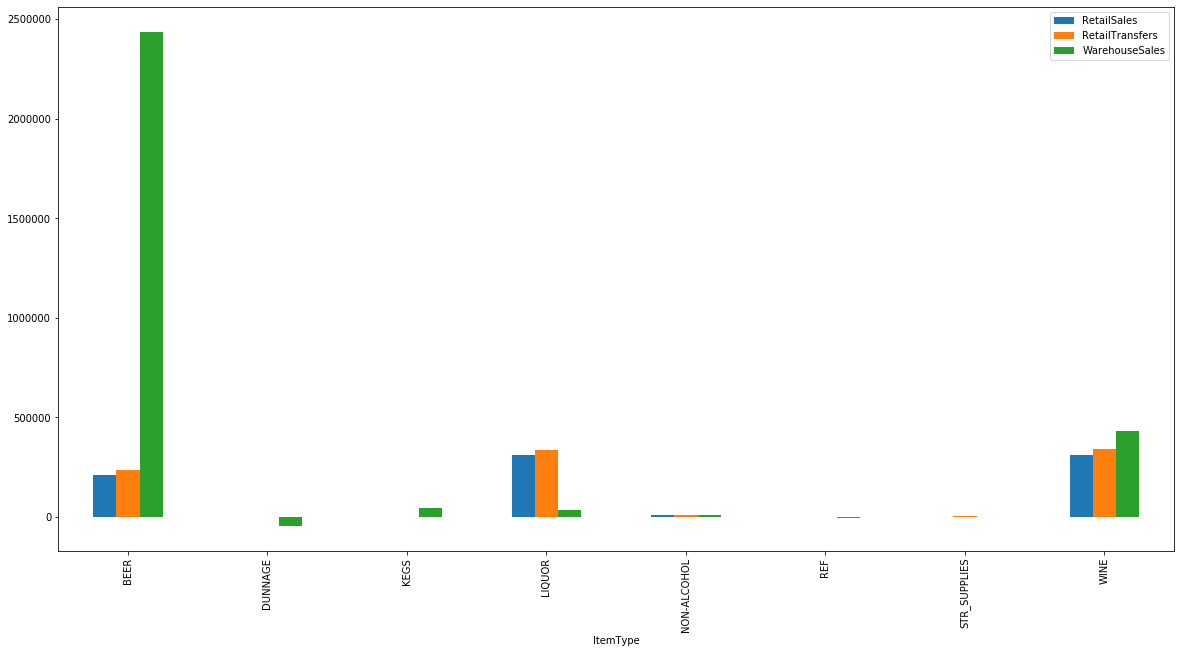

In [9]:
bars = data[["RetailSales", "RetailTransfers", "WarehouseSales", "ItemType"]].groupby(["ItemType"]).agg("sum")
bars.plot.bar(figsize=(20,10))

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

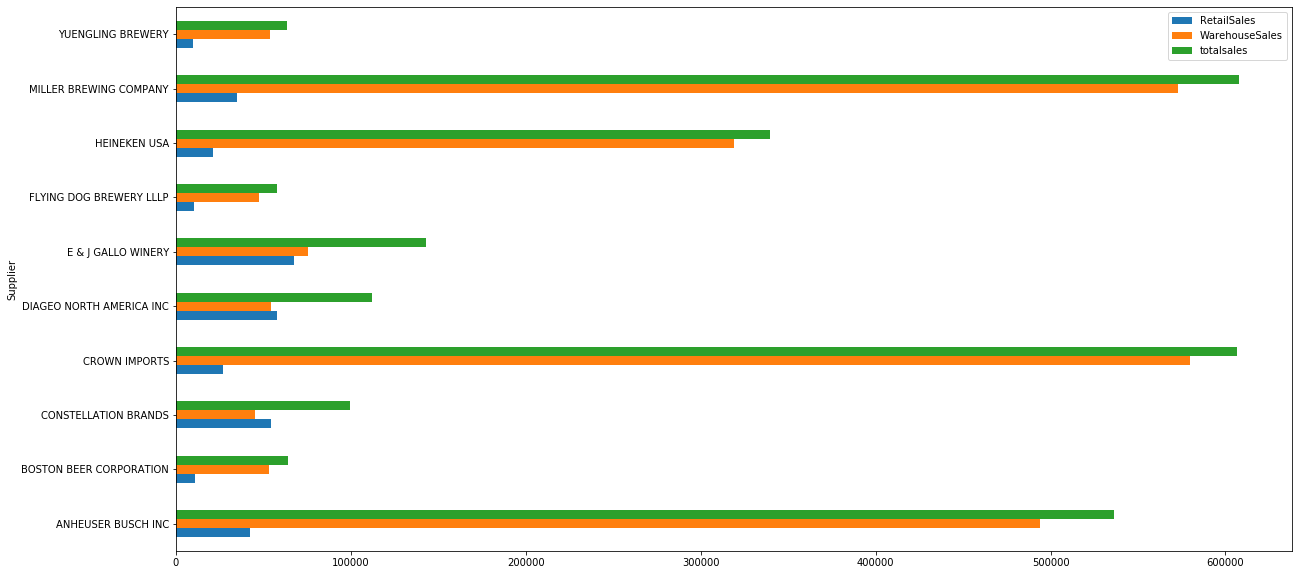

In [51]:
data["totalsales"]=data["RetailSales"]+data["WarehouseSales"]
datatopsales=data.sort_values(by=['totalsales'],ascending=False)
datatopsupply=datatopsales[["RetailSales","WarehouseSales","Supplier","totalsales"]].groupby(["Supplier"]).agg({"totalsales":'sum', 'RetailSales':'sum','WarehouseSales':'sum'})
datatopsupply

datatopsupplier=datatopsupply[["RetailSales","WarehouseSales", "totalsales"]].sort_values(by='totalsales',ascending=False).head(10)
datatopsupplier

bars = datatopsupplier[["RetailSales","WarehouseSales","totalsales"]].groupby(["Supplier"]).agg("sum")
bars.plot.barh(figsize=(20,10))

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

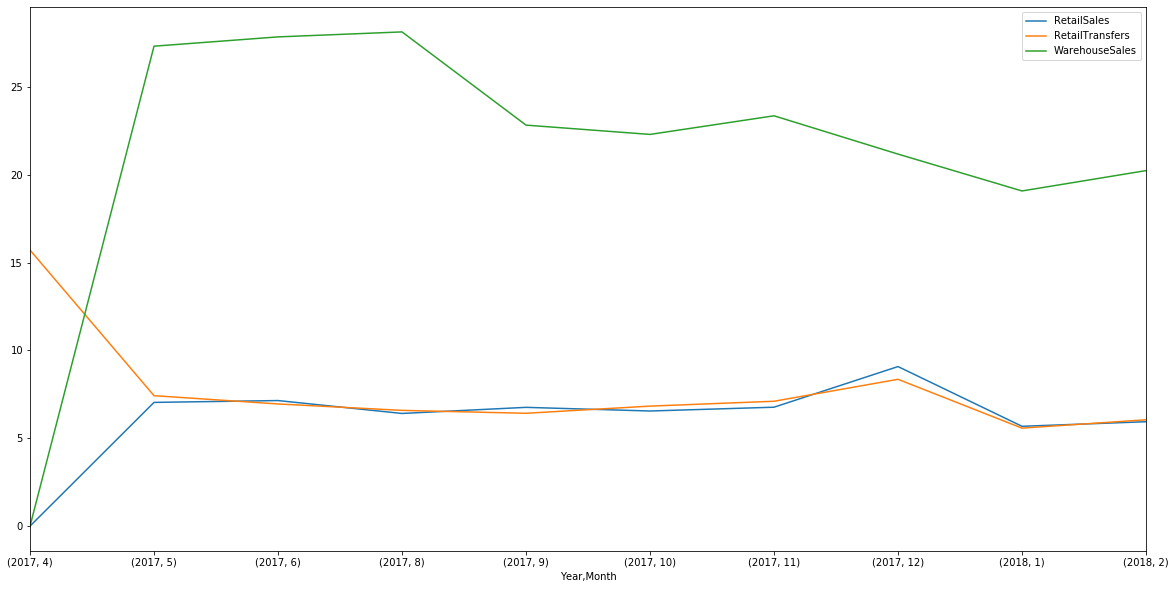

In [66]:
df = data.pivot_table(index=['Year','Month'], values=['RetailSales', 'RetailTransfers', 'WarehouseSales'], aggfunc='mean')
df.plot(figsize=(20,10))

## 4. Plot the same information as above but as a bar chart.

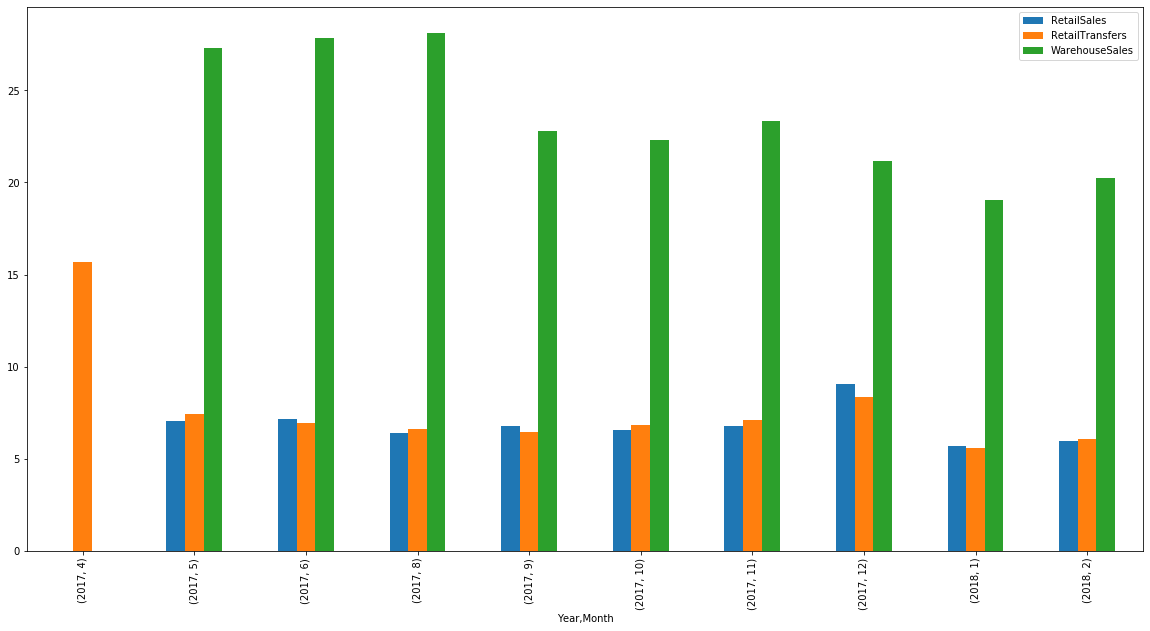

In [67]:
df.plot.bar(figsize=(20,10))

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

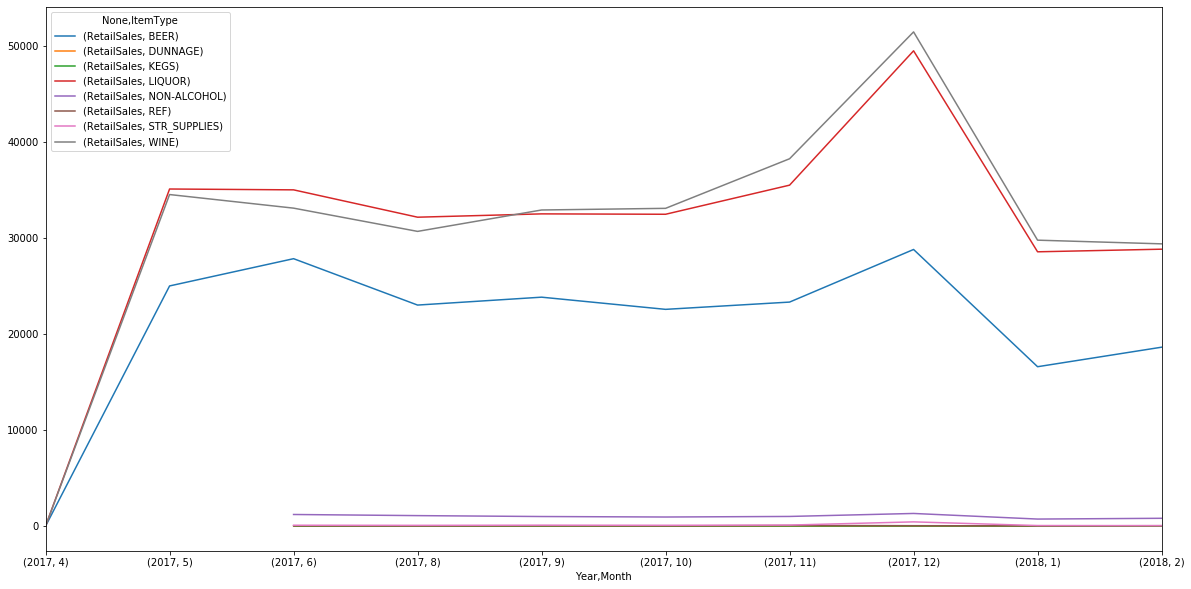

In [77]:
df1 = data.pivot_table(index=['Year','Month'], values=['RetailSales'], columns=['ItemType'], aggfunc='sum')
df1.plot(figsize=(20,10))

## 6. Plot the same information as above but as a bar chart.

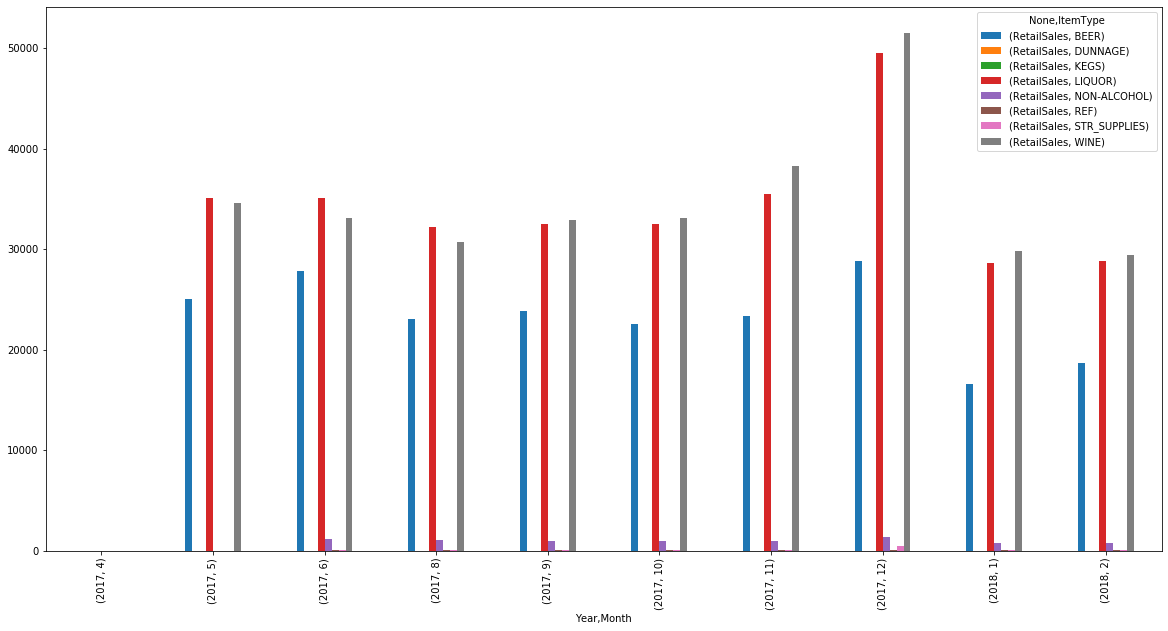

In [75]:
df1.plot.bar(figsize=(20,10))

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

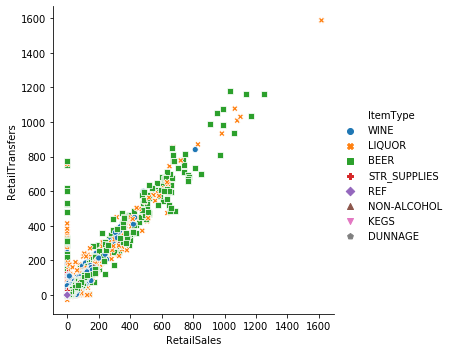

In [84]:
plot = sns.relplot(x="RetailSales", y="RetailTransfers", hue="ItemType",style="ItemType",data=data)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

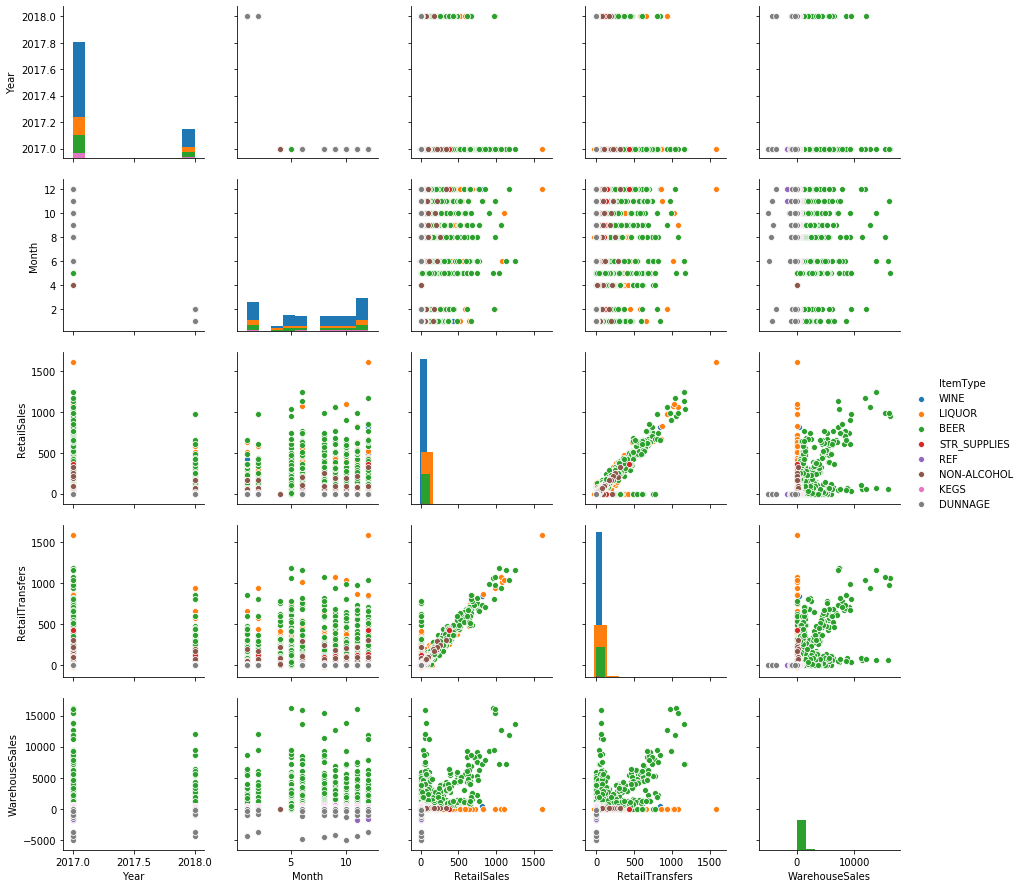

In [97]:
sns.pairplot(data,diag_kind='hist',hue='ItemType')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE447BEBA8>,
      dtype=object)

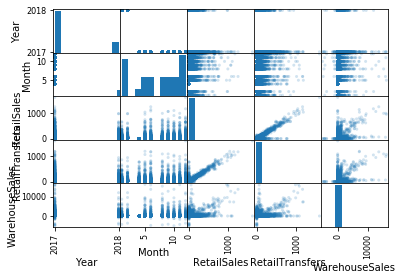

In [92]:
pd.plotting.scatter_matrix(data, alpha=0.2)

LinAlgError: singular matrix

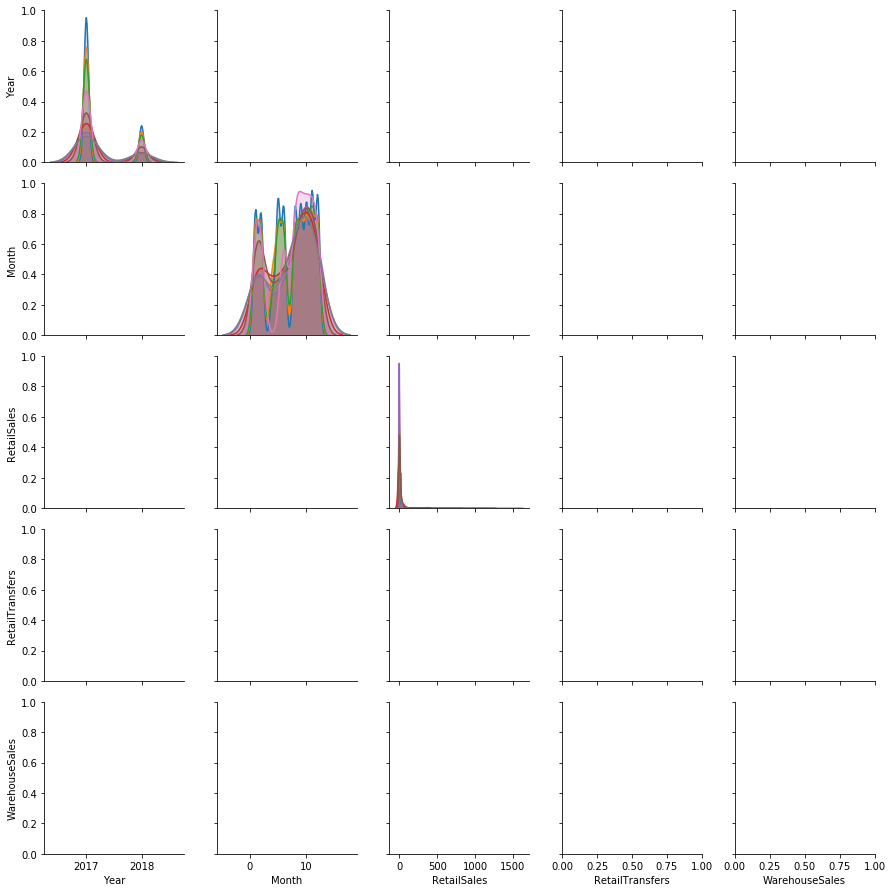

In [96]:
numeric = data.select_dtypes(include=np.number)
numeric['Type'] = data['ItemType']
sns.pairplot(numeric, hue='Type')